# Machine Learning, Spring 2023: Project 2

### KAMAL SUBEDI (G35111003) 


#### Dataset : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
##### Dataset Description: Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

##### Attribute Information:

1) ID number 
2) Diagnosis (M = malignant, B = benign)  

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area 

e) smoothness (local variation in radius lengths) 

f) compactness (perimeter^2 / area - 1.0) 

g) concavity (severity of concave portions of the contour) 

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
         'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
         'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
         'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
         'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
         'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
         'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data = pd.read_csv(url, names=names)
data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [3]:
print("Number of rows and columns:", data.shape)
print("Column names:", data.columns)

Number of rows and columns: (569, 32)
Column names: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [4]:
# dropping unnecessary first column (id)
data.drop(data.columns[[-1,0]], axis=1, inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


In [5]:
# Print the number of benign and malignant samples
print(data['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


<Axes: xlabel='diagnosis', ylabel='count'>

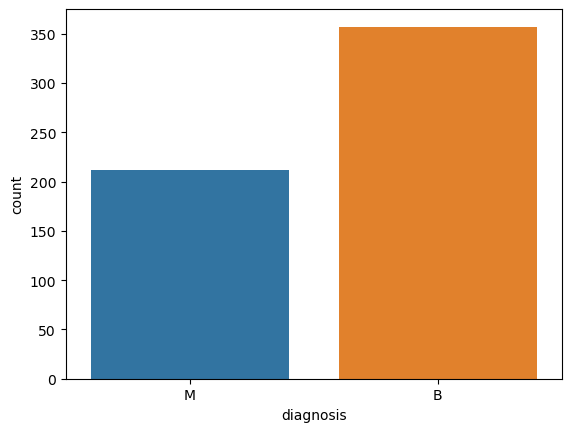

In [6]:
sb.countplot(x=data['diagnosis'], label = "Count")

In [7]:
# convert categorical labels to numbers
diag_map = {'M': 1.0, 'B': -1.0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

In [8]:
# Check for missing values
print(data.isnull().sum())

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
perimeter_se              0
area_se                   0
smoothness_se             0
compactness_se            0
concavity_se              0
concave_points_se         0
symmetry_se               0
fractal_dimension_se      0
radius_worst              0
texture_worst             0
perimeter_worst           0
area_worst                0
smoothness_worst          0
compactness_worst         0
concavity_worst           0
concave_points_worst      0
symmetry_worst            0
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    float64
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave_points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [10]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,-0.254833,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076
std,0.967836,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867
min,-1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500
25%,-1.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400
50%,-1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800


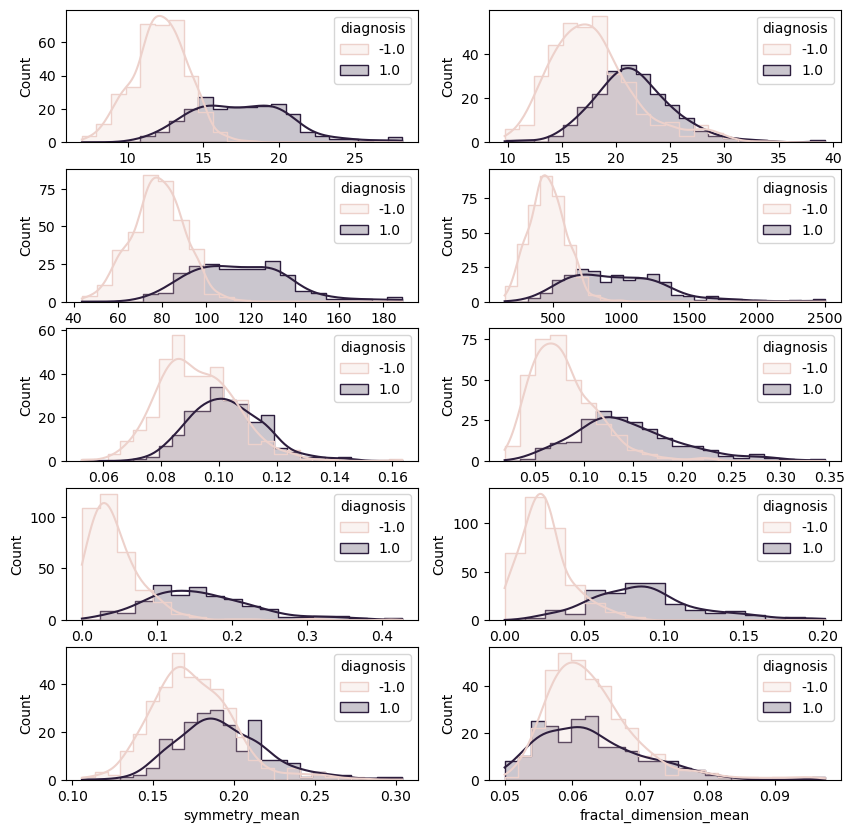

In [11]:
# Histograms of the mean features for each diagnosis
plt.figure(figsize=(10, 10))
for i, feature in enumerate(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                             'smoothness_mean', 'compactness_mean', 'concavity_mean',
                             'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']):
    plt.subplot(5, 2, i+1)
    sb.histplot(data=data, x=feature, hue='diagnosis', element='step', kde=True)
#plt.tight_layout()

<Axes: >

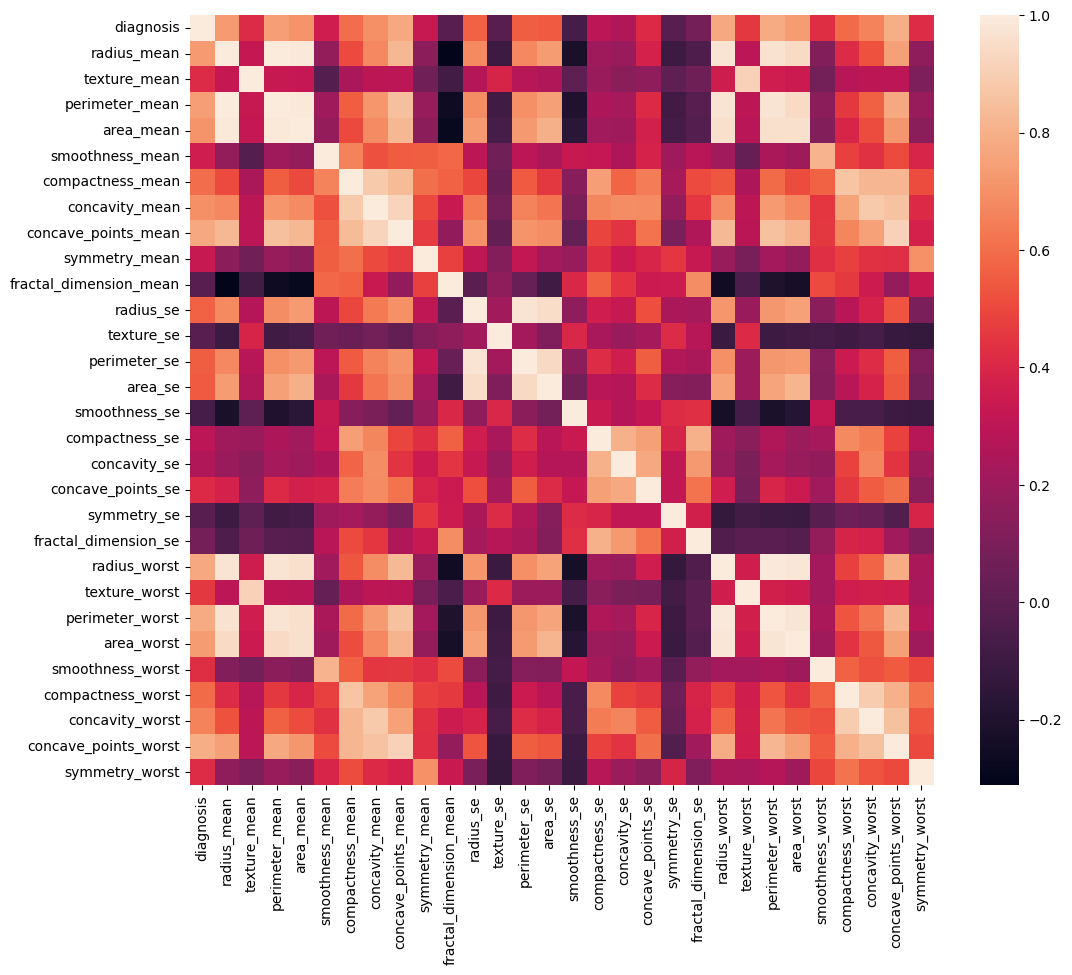

In [43]:
#let's find which features should we keep and which are needed to drop.
# Finding correlation for Feature selection 
plt.figure(figsize=(12, 10))
sb.heatmap(data.corr())

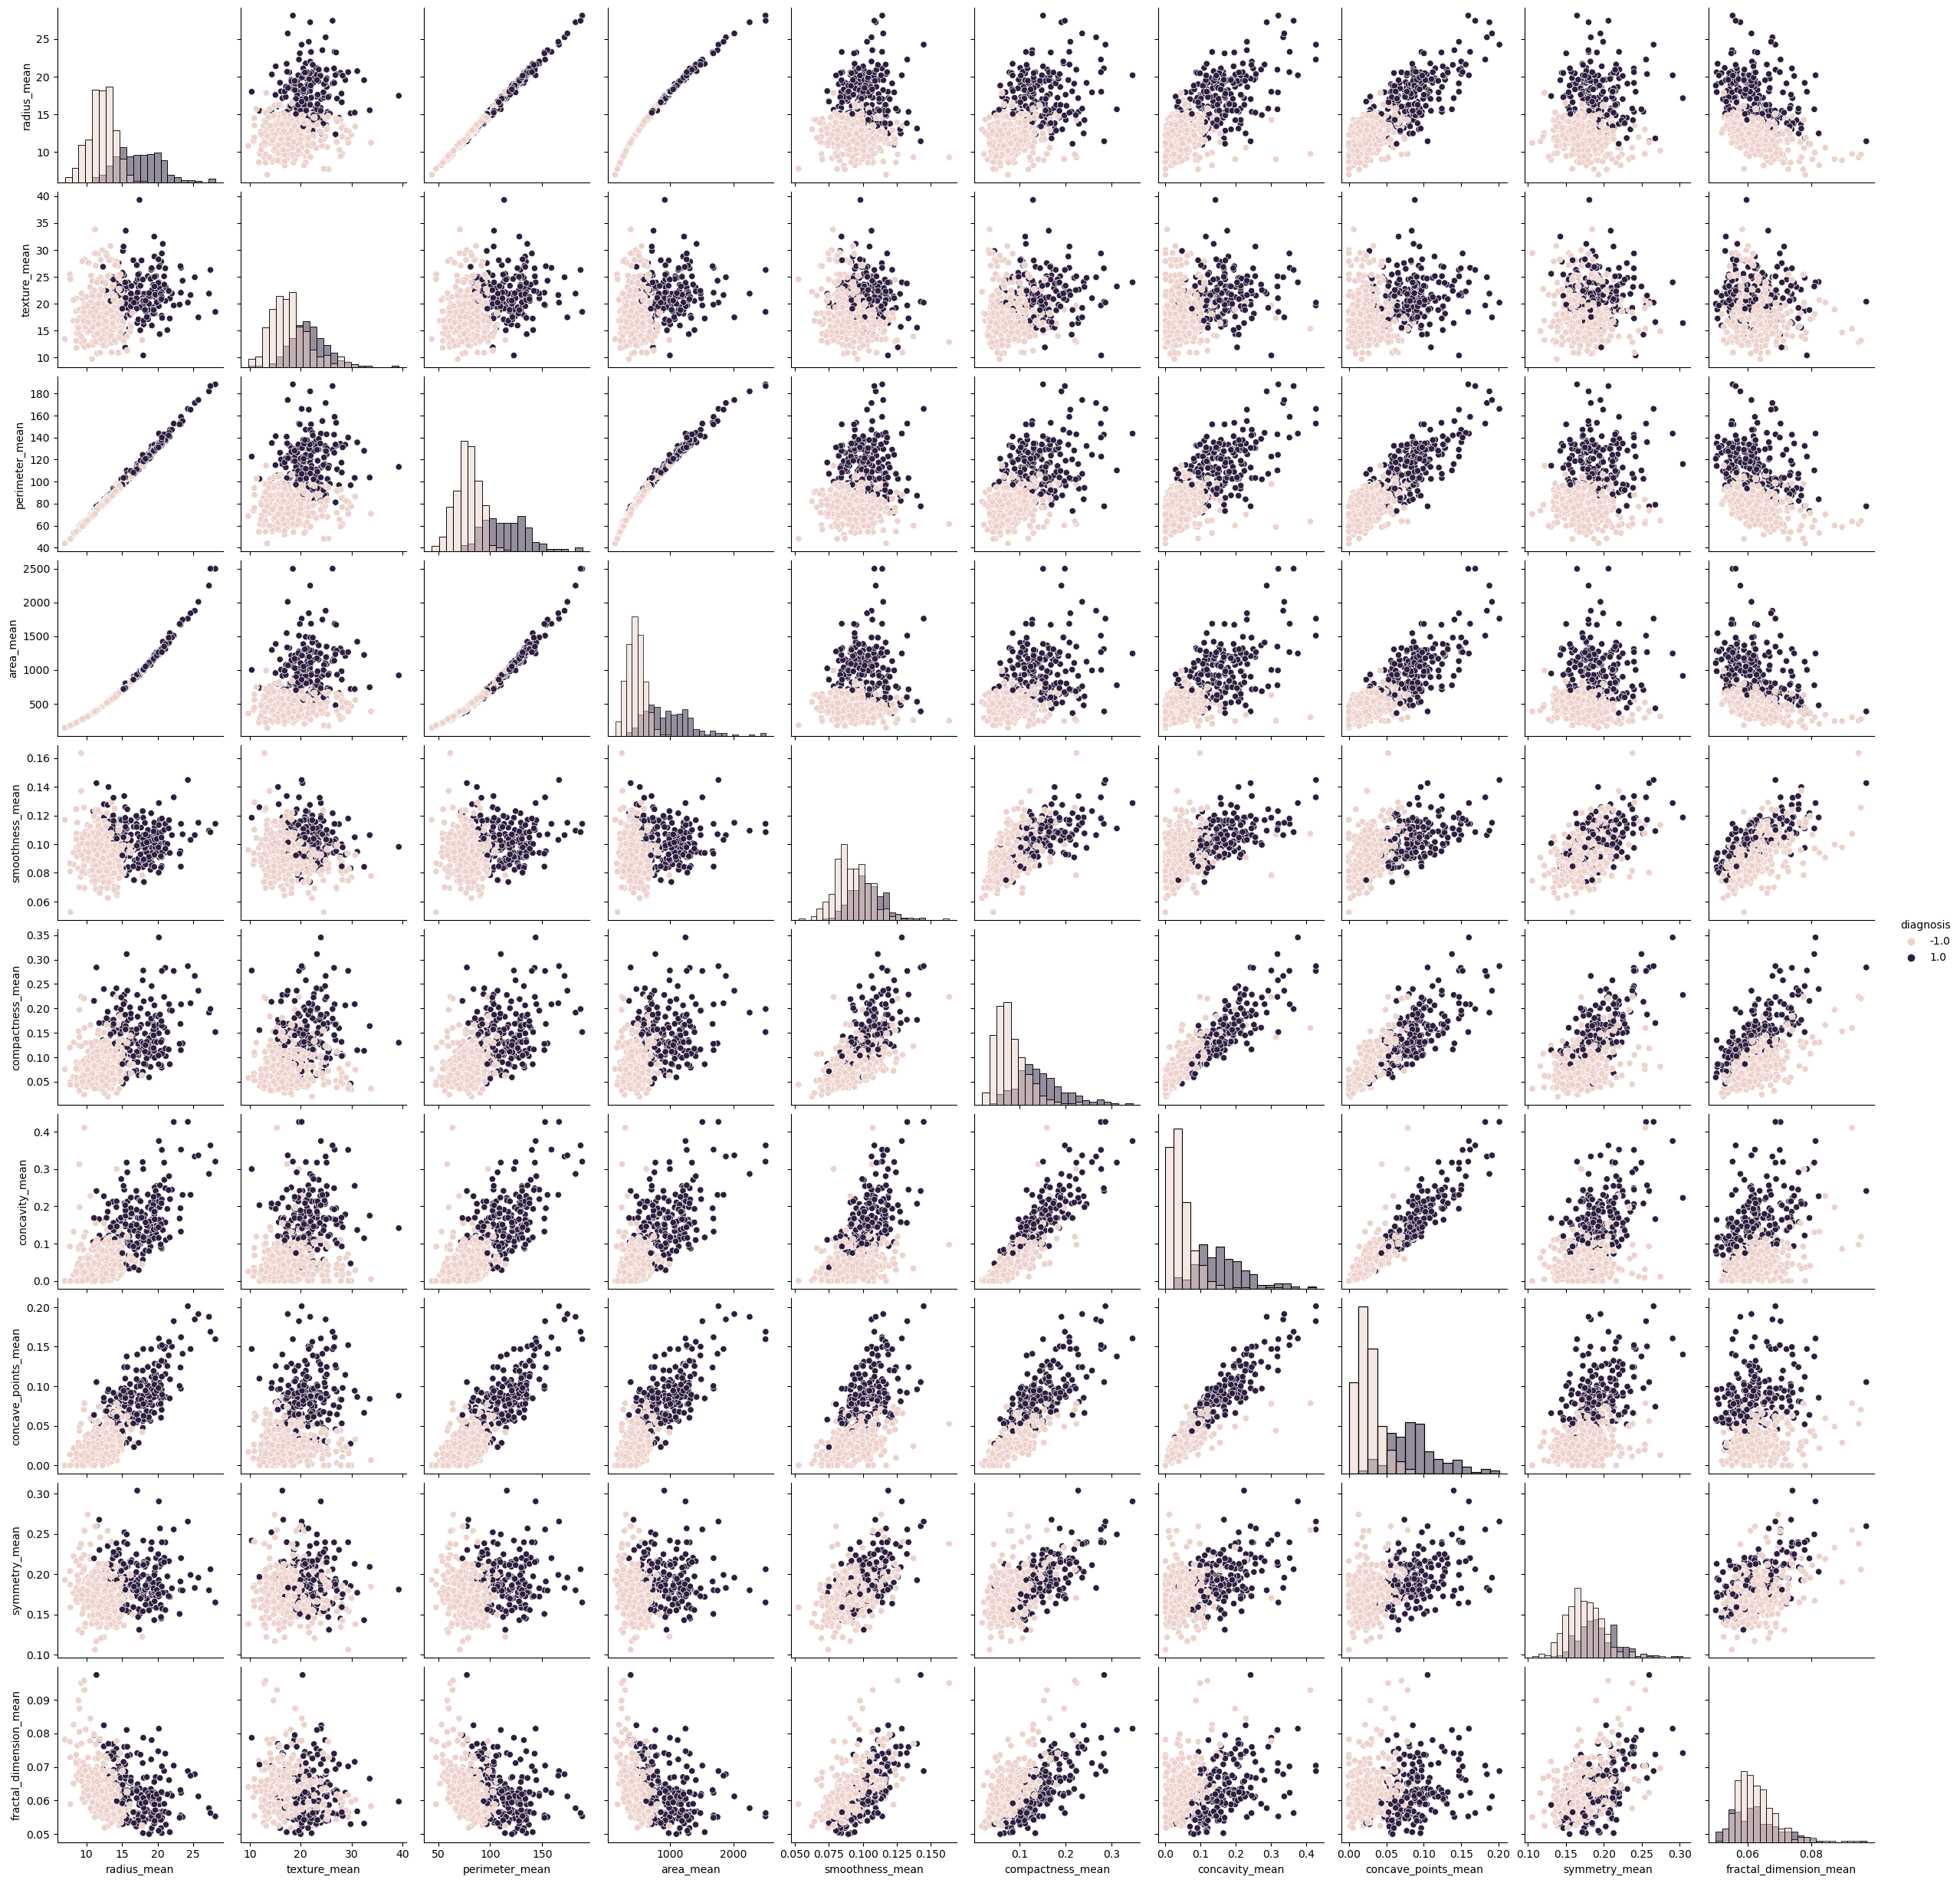

In [13]:
# Pairplot of the mean features for each diagnosis
sb.pairplot(data, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],hue='diagnosis', diag_kind='hist', height=2.5)
plt.show()

In [14]:
# put features & outputs in different data frames
Y = data.loc[:, 'diagnosis']
X = data.iloc[:, 1:]

In [15]:
#here, we know that there are so many feature which somehow equally correlated to each other. so, taking o.9 correlation threshold to drop the feature which have more vaues
# it helps to select the best features among them 
def drop_corr_features(X):
    corr_threshold = 0.9
    corr = X.corr()
    drop_columns = np.full(corr.shape[0], False, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= corr_threshold:
                drop_columns[j] = True
    columns_dropped = X.columns[drop_columns]
    X.drop(columns_dropped, axis=1, inplace=True)
    return columns_dropped

In [16]:
# filter features
drop_corr_features(X)

/var/folders/nf/gjk1b0x54993dfl5m_49xrp00000gn/T/ipykernel_4599/1311594583.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns_dropped, axis=1, inplace=True)


Index(['perimeter_mean', 'area_mean', 'concave_points_mean', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'concave_points_worst'],
      dtype='object')

In [17]:
# normalize data for better convergence and to prevent overflow
X_normalized = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_normalized)

In [18]:
# insert 1 in every row for intercept b
X.insert(loc=len(X.columns), column='intercept', value=1)

In [19]:
# split data into train and test set
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=42)

In [34]:
start = time.process_time()
lmda = 10000
learning_rate = 0.0000001

def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    # equivalent to max(0, distance)
    distances[distances < 0] = 0  
    hinge_loss = lmda * (np.sum(distances) / N)

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.float64:
        # gives multidimensional array
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (lmda * Y_batch[ind] * X_batch[ind])
        dw += di
    # average
    dw = dw/len(Y_batch)  
    return dw


def sgd(features, outputs):
    max_epochs = 10000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    # cost_threshold in percent
    cost_threshold = 0.01  
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights

In [35]:
# train the model
W = sgd(X_train.to_numpy(), y_train.to_numpy())
print("weights are",W)

Epoch is: 1 and Cost is: 9557.52139712943
Epoch is: 2 and Cost is: 9115.085227838006
Epoch is: 4 and Cost is: 8230.331799172602
Epoch is: 8 and Cost is: 7087.961414213706
Epoch is: 16 and Cost is: 6027.761821194273
Epoch is: 32 and Cost is: 4333.198405133368
Epoch is: 64 and Cost is: 2942.049835091613
Epoch is: 128 and Cost is: 2193.420066485563
Epoch is: 256 and Cost is: 1711.2257723104788
Epoch is: 512 and Cost is: 1358.675832339247
Epoch is: 1024 and Cost is: 1108.292228269543
Epoch is: 2048 and Cost is: 947.6885234262077
Epoch is: 4096 and Cost is: 867.2040613980679
Epoch is: 8192 and Cost is: 824.7369306329063
Epoch is: 9999 and Cost is: 820.4107909617971
weights are [ 7.2599192   4.51493561 -0.24049407  0.25306576  5.8049835  -0.59074144
 -2.82965867  8.18259264  0.09270146  1.47807436 -2.65259832 -3.08658751
  0.46554828 -3.00935198 -1.16606769  3.17109848  1.46541952  2.52621367
  5.05513084 -7.86172791]


In [36]:
y_train_pred = np.array([])
for i in range(X_train.shape[0]):
    yp = np.sign(np.dot(X_train.to_numpy()[i], W))
    y_train_pred = np.append(y_train_pred, yp)
    
# testing the model
y_pred = np.array([])
for i in range(X_test.shape[0]):
    yp = np.sign(np.dot(X_test.to_numpy()[i], W))
    y_pred = np.append(y_pred, yp)

In [37]:
print ("Accuracy of this model is", accuracy_score(y_test, y_pred)*100,'%',)
print("Recall is",recall_score(y_test, y_pred)*100,'%')
print("precision is",precision_score(y_test, y_pred)*100,'%')
end = time.process_time()
print("Time elapsed for the algorithm:", end - start)

Accuracy of this model is 98.24561403508771 %
Recall is 97.67441860465115 %
precision is 97.67441860465115 %
Time elapsed for the algorithm: 34.35996200000001


In [ ]:
# Here, you can see that the accuracy of the model is 98% which is consider as the accurate model.  

In [38]:
#Get the confusion matrix using sklearn library 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[70  1]
 [ 1 42]]

True Positives(TP) =  70

True Negatives(TN) =  42

False Positives(FP) =  1

False Negatives(FN) =  1


Text(0.5, 23.52222222222222, 'Predicted label')

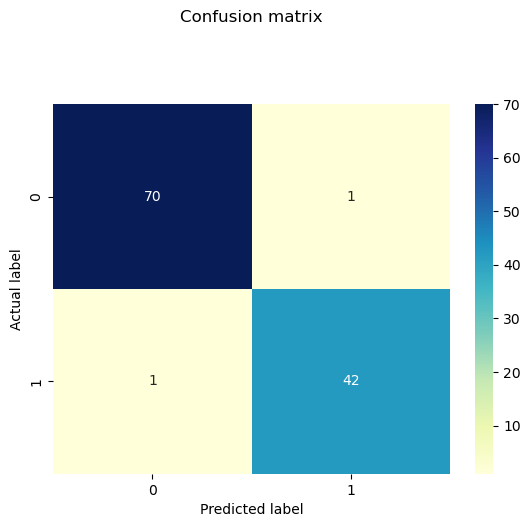

In [39]:
#Plot the TP, TN, FP, FN values 
p = sb.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')